<a href="https://colab.research.google.com/github/protontypes/osta/blob/main/packages_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pyalex semanticscholar habanero itables

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import pyalex
pyalex.config.email = "ly0@protonmail.com"
from habanero import counts

from semanticscholar import SemanticScholar
sch = SemanticScholar()

URL = "https://ost.ecosyste.ms/api/v1/projects/packages"
FILE_TO_SAVE_AS = "ecosystems_downloads.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [5]:
df = pd.read_json(resp.content.decode())

In [6]:
df.head(30)

id                  name                                        description                                                url                   last_synced_at                                         repository                                              owner                                           packages                                            commits                                       issues_stats                                             events                                           keywords                                       dependencies      score                       created_at                       updated_at                                  avatar_url language                 category                               sub_category  monthly_downloads                                             readme                                      funding_links                                    readme_doi_urls                                              works  \
0     9458                xarray  An open source project and Python package that...                   https://github.com/pydata/xarray 2024-12-22 00:39:59.485000+00:00  {'id': 10920764, 'uuid': '13221727', 'full_nam...  {'login': 'pydata', 'name': 'Python for Data',...  [{'id': 2976737, 'name': 'xray', 'ecosystem': ...  {'full_name': 'pydata/xarray', 'default_branch...  {'full_name': 'pydata/xarray', 'html_url': 'ht...  {'total': {'CreateEvent': 8, 'ReleaseEvent': 1...      [dask, netcdf, numpy, pandas, python, xarray]  [{'ecosystem': 'actions', 'filepath': '.github...  31.823576 2023-09-11 14:36:19.560000+00:00 2024-12-22 00:39:59.515000+00:00               https://github.com/pydata.png   Python           Climate Change                     Climate Data Standards            5968476  # xarray: N-D labeled arrays and datasets\n\n[...  [https://github.com/sponsors/numfocus, https:/...          [https://doi.org/10.5281/zenodo.11183201]                                                 {}   
1    20618         netcdf-python  The Unidata network Common Data Form (netCDF) ...          https://github.com/Unidata/netcdf4-python 2024-12-22 00:10:50.149000+00:00  {'id': 13200625, 'uuid': '15884459', 'full_nam...  {'login': 'Unidata', 'name': 'NSF Unidata', 'u...  [{'id': 2817126, 'name': 'netcdf4', 'ecosystem...  {'full_name': 'Unidata/netcdf4-python', 'defau...  {'full_name': 'Unidata/netcdf4-python', 'html_...  {'total': {'IssuesEvent': 20, 'WatchEvent': 7,...                          [netcdf, netcdf4, python]  [{'ecosystem': 'actions', 'filepath': '.github...  26.005541 2023-09-11 14:52:14.006000+00:00 2024-12-22 00:10:50.205000+00:00              https://github.com/Unidata.png   Cython           Climate Change                     Climate Data Standards            2394863  To update web docs at http://github.unidata.io...                                                 []                                                 []                                                 {}   
2      903              h5netcdf  A Python interface for the netCDF4 file format...               https://github.com/h5netcdf/h5netcdf 2024-12-21 23:42:20.762000+00:00  {'id': 30013337, 'uuid': '33561533', 'full_nam...  {'login': 'h5netcdf', 'name': 'h5netcdf', 'uui...  [{'id': 75447, 'name': 'py-h5netcdf', 'ecosyst...  {'full_name': 'h5netcdf/h5netcdf', 'default_br...  {'full_name': 'h5netcdf/h5netcdf', 'html_url':...  {'total': {'CreateEvent': 1, 'ReleaseEvent': 1...                       [h5py, hdf5, netcdf, python]  [{'ecosystem': 'actions', 'filepath': '.github...  22.304369 2023-09-11 11:54:36.292000+00:00 2024-12-21 23:42:23.632000+00:00             https://github.com/h5netcdf.png   Python           Climate Change                     Climate Data Standards             948251  h5netcdf\n========\n\n.. image:: https://githu...                                                 []                                                 []                                                 {}   
3    197

In [7]:
df.iloc[1]["packages"][0] # GO packages do not provide montly download numbers. That's why we had to kick out kube-green

{'id': 2817126,
 'name': 'netcdf4',
 'ecosystem': 'pypi',
 'description': 'Provides an object-oriented python interface to the netCDF version 4 library',
 'homepage': None,
 'licenses': 'MIT',
 'normalized_licenses': ['MIT'],
 'repository_url': 'https://github.com/unidata/netcdf4-python',
 'keywords_array': ['numpy',
  'netcdf',
  'data',
  'science',
  'network',
  'oceanography',
  'meteorology',
  'climate'],
 'namespace': None,
 'versions_count': 86,
 'first_release_published_at': '2006-11-22T14:07:30.000Z',
 'latest_release_published_at': '2024-10-22T19:00:28.000Z',
 'latest_release_number': '1.7.2',
 'last_synced_at': '2024-12-20T23:35:57.830Z',
 'created_at': '2022-04-10T11:44:17.585Z',
 'updated_at': '2024-12-20T23:35:57.831Z',
 'registry_url': 'https://pypi.org/project/netcdf4/',
 'install_command': 'pip install netcdf4 --index-url https://pypi.org/simple',
 'documentation_url': 'https://unidata.github.io/netcdf4-python/',
 'metadata': {'funding': None,
  'documentation': 'htt

In [8]:
names = []
download_counts = []
url = []
description = []
category = []
sub_category = []
language = []
docker_downloads = []
doi = []
citations = []

for index, row in df.iterrows():
    names.append(row['name'])
    package_downloads = 0
    docker_download_count = 0
    for package_manager in range(len(row['packages'])):
        if row['packages'][package_manager]['downloads']:
            if row['packages'][package_manager]['downloads_period'] == "last-month":
                package_downloads += row['packages'][package_manager]['downloads']
        if row['packages'][package_manager]['docker_downloads_count']:
            docker_download_count = row['packages'][package_manager]['docker_downloads_count']
        else:
            docker_download_count = 0
    download_counts.append(package_downloads)
    docker_downloads.append(docker_download_count)
    url.append(row['url'])
    description.append(row['description'])
    category.append(row['category'])
    sub_category.append(row['sub_category'])
    language.append(row['language'])
    citations.append(row['total_citations'])


In [9]:
df_extract = pd.DataFrame()
df_extract['project_names'] = names
df_extract['download_counts'] = download_counts
df_extract['git_url'] = url
df_extract['description'] = description
df_extract['category'] = category
df_extract['sub_category'] = sub_category
df_extract['language'] = language
df_extract['docker_downloads'] = docker_downloads
df_extract['citations'] = citations
df_extract.head(200)


project_names  download_counts                                            git_url                                        description                 category                                    sub_category          language  docker_downloads  citations
0                                               xarray          5968476                   https://github.com/pydata/xarray  An open source project and Python package that...           Climate Change                          Climate Data Standards            Python                 0          0
1                                        netcdf-python          2394863          https://github.com/Unidata/netcdf4-python  The Unidata network Common Data Form (netCDF) ...           Climate Change                          Climate Data Standards            Cython                 0          0
2                                             h5netcdf           948251               https://github.com/h5netcdf/h5netcdf  A Python interface for the netCDF4 file format...           Climate Change                          Climate Data Standards            Python                 0          0
3                                         pvlib-python           658610              https://github.com/pvlib/pvlib-python  A set of documented functions for simulating t...         Renewable Energy                  Photovoltaics and Solar Energy            Python                 0        475
4                                            entsoe-py           390992             https://github.com/EnergieID/entsoe-py  A Python client for the ENTSO-E API (European ...           Energy Systems       Energy Data Accessibility and Integration            Python                 0          0
5                                            cf-xarray           326054        https://github.com/xarray-contrib/cf-xarray  An accessor for xarray objects that interprets...           Climate Change                          Climate Data Standards            Python                 0          0
6                                     Meteostat Python           301275      https://github.com/meteostat/meteostat-python  Access and analyze historical weather and clim...           Climate Change           Climate Data Access and Visualization            Python               138          0
7                                               cfgrib           226496                    https://github.com/ecmwf/cfgrib  A Python interface to map GRIB files to the Ne...           Climate Change            Climate Data Processing and Analysis            Python                 0          0
8                                               thermo           196537                https://github.com/CalebBell/thermo  Thermodynamics, phase equilibrium, transport p...         Renewable Energy                               Geothermal Energy            Python                 0          0
9                                               cdsapi           177066                    https://github.com/ecmwf/cdsapi  Python API to access the Copernicus Climate Da...           Climate Change           Climate Data Access and Visualization            Python                 0          0
10                                              Siphon           173811                  https://github.com/Unidata/siphon  A collection of Python utilities for retrievin...  Sustainable Development                    Data Catalogs and Interfaces            Python                 0          0
11                                     BikeshareClient                0          https://github.com/andmos/BikeshareClient  Dotnet library for integrating with GBFS bikes...              Consumption                     Mobility and Transportation                C#                 0          0
12                                               xclim           122211                https://github.com/ouranosinc/xclim  A library of derived climate variables, i.e. c...           Climate Change            Climate D

In [8]:
df_extract.loc[df['language'] == 'Julia']

project_names  download_counts                                            git_url                                        description                 category                              sub_category language  docker_downloads  citations
349                     Ribasim              691                https://github.com/Deltares/Ribasim  A water resources model, designed to be the re...        Natural Resources                  Water Supply and Quality    Julia                 0          0
740    InfrastructureSystems.jl                0  https://github.com/NREL-Sienna/InfrastructureS...  Provides utilities to support data models for ...           Energy Systems             Grid Management and Microgrid    Julia                 0          0
741                       LiBRA                0          https://github.com/bradyplanden/liibra.jl  Create reduced-order state-space models for li...           Energy Storage                                   Battery    Julia                 0          1
742               OceanBioME.jl                0        https://github.com/OceanBioME/OceanBioME.jl  A tool to study the effectiveness and impacts ...                Emissions                            Carbon Capture    Julia                 0          0
749            SpeedyWeather.jl                0  https://github.com/speedyweather/speedyweather.jl  A global spectral atmospheric model with simpl...               Atmosphere      Atmospheric Composition and Dynamics    Julia                 0          0
759         PowerModelsAnnex.jl                0   https://github.com/lanl-ansi/PowerModelsAnnex.jl  An extension of PowerModels.jl that provides a...           Energy Systems                Grid Analysis and Planning    Julia                 0          0
762              PowerModels.jl                0        https://github.com/lanl-ansi/PowerModels.jl  Designed to enable computational evaluation of...           Energy Systems                Grid Analysis and Planning    Julia                 0          0
768         ClimateSatellite.jl                0  https://github.com/juliaclimate/climatesatelli...  Julia package that downloads measurements and ...           Climate Change     Climate Data Access and Visualization    Julia                 0          0
770                   AIBECS.jl                0            https://github.com/juliaocean/aibecs.jl  A Julia package that provides ocean biogeochem...              Hydrosphere              Ocean Carbon and Temperature    Julia                 0          3
781      PlanktonIndividuals.jl                0  https://github.com/JuliaOcean/PlanktonIndividu...  This package simulates the behaviors of an ens...                Biosphere                   Marine Life and Fishery    Julia                 0          1
788             PowerSystems.jl                0     https://github.com/nrel-sienna/powersystems.jl  Provides a rigorous data model using Julia str...           Energy Systems         Energy System Modeling Frameworks    Julia                 0         15
790             ClimateTools.jl                0    https://github.com/juliaclimate/climatetools.jl  A collection of commonly-used tools in climate...           Climate Change      Climate Data Processing and Analysis    Julia                 0          0
793             Oceananigans.jl                0           https://github.com/clima/oceananigans.jl  Fast and friendly fluid dynamics on CPUs and G...              Hydrosphere                              Ocean Models    Julia                 0         25
795        CapacityExpansion.jl                0  https://github.com/YoungFaithful/CapacityExpan...  Future energy system planning (Generation and ...           Energy Systems         Energy System Modeling Frameworks    Julia                 0         87
800            ClimateModels.jl                0     https://github.com/gaelforget/climatemodels.jl  Uniform interface to climate models of varying...           Climate Change   

In [11]:
import textwrap

def text_to_link(project_name, git_url):
    return '<a href="' + git_url + '" target="_blank" style = "color: black">' + str(project_name) + "</a>"

def text_to_bolt(topic):
    return "<b>" + topic + "</b>"

def line_break_text(text):
    wrapped_text = '<br>'.join(textwrap.wrap(text, 64))
    return wrapped_text

df_extract["description"] = df_extract.apply(
    lambda x: line_break_text(x.description), axis=1
)


df_extract["project_names"] = df_extract.apply(
    lambda x: text_to_link(x.project_names, x.git_url), axis=1
)
df_extract

project_names  download_counts                                            git_url                                        description            category                               sub_category language  docker_downloads  citations
0    <a href="https://github.com/pydata/xarray" tar...          5968476                   https://github.com/pydata/xarray  An open source project and Python package that...      Climate Change                     Climate Data Standards   Python                 0          0
1    <a href="https://github.com/Unidata/netcdf4-py...          2394863          https://github.com/Unidata/netcdf4-python  The Unidata network Common Data Form (netCDF) ...      Climate Change                     Climate Data Standards   Cython                 0          0
2    <a href="https://github.com/h5netcdf/h5netcdf"...           948251               https://github.com/h5netcdf/h5netcdf  A Python interface for the netCDF4 file format...      Climate Change                     Climate Data Standards   Python                 0          0
3    <a href="https://github.com/pvlib/pvlib-python...           658610              https://github.com/pvlib/pvlib-python  A set of documented functions for simulating t...    Renewable Energy             Photovoltaics and Solar Energy   Python                 0        475
4    <a href="https://github.com/EnergieID/entsoe-p...           390992             https://github.com/EnergieID/entsoe-py  A Python client for the ENTSO-E API (European ...      Energy Systems  Energy Data Accessibility and Integration   Python                 0          0
..                                                 ...              ...                                                ...                                                ...                 ...                                        ...      ...               ...        ...
939  <a href="https://github.com/lanl-ansi/WaterMod...                0        https://github.com/lanl-ansi/WaterModels.jl  Designed to enable computational evaluation of...   Natural Resources                   Water Supply and Quality    Julia                 0          0
940  <a href="https://github.com/USEPA/ElectricityL...                0            https://github.com/USEPA/ElectricityLCI  A Python package that uses standardized facili...  Industrial Ecology                      Life Cycle Assessment   Python                 0          0
941  <a href="https://github.com/pypsa/pypsa-eur" t...                0                 https://github.com/pypsa/pypsa-eur  A Sector-Coupled Open Optimization Model of th...      Energy Systems              Regional Energy System Models   Python                 0         36
942  <a href="https://github.com/xCDAT/xcdat" targe...                0                     https://github.com/xCDAT/xcdat  An extension of xarray for climate data analys...      Climate Change       Climate Data Processing and Analysis   Python                 0          0
943  <a href="https://github.com/FZJ-IEK3-VSA/LoadP...                0  https://github.com/FZJ-IEK3-VSA/LoadProfileGen...  A program for generating load curves for resid...         Consumption                      Buildings and Heating       C#                 0          9

[944 rows x 9 columns]

In [15]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

# Get the current date
current_date = datetime.now()

# Format the date to display the full month and year
month_year = current_date.strftime("%B %Y")


#df_extract = df_extract[df_extract["category"] == "Renewable Energy"]

number_of_projects_to_show = 300
top_downloaders = df_extract.nlargest(number_of_projects_to_show, "download_counts")
top_downloaders.index.name = "ranking"
color_discrete_sequence = px.colors.qualitative.Vivid
fig = px.bar(
    top_downloaders,
    x=top_downloaders["download_counts"],
    y=top_downloaders["project_names"],
    custom_data=["project_names", "download_counts", "docker_downloads", "git_url", "description","category","sub_category","language",top_downloaders.index+1],
    orientation="h",
    color = 'category',
    color_discrete_sequence=color_discrete_sequence,
)

fig.update_layout(
    height=number_of_projects_to_show*20,  # Added parameter
    #width=700,
    xaxis_title="",
    yaxis_title=None,
    title="Package Downloads of Open Source Project in Climate and Sustainability in "+month_year,
    dragmode=False,
)

fig.update_layout(hovermode="y unified",hoverdistance=1000)

fig.update_traces(
    hovertemplate="<extra></extra>"+"<br>".join(
        [
            "Ranking: <b>%{customdata[8]}</b>",
            "Description: <b>%{customdata[4]}</b>",
            "Sub Category: <b>%{customdata[6]}</b>",
            "Language: <b>%{customdata[7]}</b>",
            "Downloads per month: <b>%{customdata[1]}</b>",
            #"Docker Downloads: <b>%{customdata[2]}</b>",
            "Category: <b>%{customdata[5]}</b>",

        ]
    )

)

#fig.update(layout_showlegend=False)

fig.update_layout(modebar=dict(bgcolor="rgba(0,0,0,0)"))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
  },
  'responsive':'true'
}
fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(modebar_color="#009485", modebar_activecolor="#2563eb")
fig["layout"]["yaxis"]["autorange"] = "reversed"

fig.update_xaxes(showspikes=False)  # <-- add this line
fig.update_yaxes(showspikes=False)  # <-- add this line
#fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
#                  plot_bgcolor = "rgba(0,0,0,0)")

#fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_type = "log",yaxis_categoryorder = 'total descending',legend_title=None, xaxis={'side': 'top'}, )
fig.show(config=config)

pio.write_json(fig,"download_plot.json")
pio.write_html(fig,"download_plot.html")


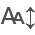

project_names  download_counts                                            git_url                                        description                 category                                    sub_category          language  docker_downloads  citations
3    <a href="https://github.com/pvlib/pvlib-python...           658610              https://github.com/pvlib/pvlib-python  A set of documented functions for simulating t...         Renewable Energy                  Photovoltaics and Solar Energy            Python                 0        475
12   <a href="https://github.com/ouranosinc/xclim" ...           122211                https://github.com/ouranosinc/xclim  A library of derived climate variables, i.e. c...           Climate Change            Climate Data Processing and Analysis            Python                 0          2
15   <a href="https://github.com/PyPSA/PyPSA" targe...            75460                     https://github.com/PyPSA/PyPSA  A free software toolbox for simulating and opt...           Energy Systems               Energy System Modeling Frameworks            Python                 0        238
21   <a href="https://github.com/blaylockbk/Herbie"...            61855               https://github.com/blaylockbk/Herbie  A python package that downloads recent and arc...               Atmosphere         Meteorological Observation and Forecast            Python                 0         77
36   <a href="https://github.com/pybamm-team/pybamm...            31534              https://github.com/pybamm-team/pybamm  Fast and flexible physics-based battery models...           Energy Storage                                         Battery            Python                 0        102
43   <a href="https://github.com/iamconsortium/pyam...            18944              https://github.com/iamconsortium/pyam  A Python package for data-wrangling, analysis ...           Climate Change        Integrated Assessment and Climate Policy            Python                 0         19
57   <a href="https://github.com/scikit-maad/scikit...             9931         https://github.com/scikit-maad/scikit-maad  Enables quantitative analysis of environmental...                Biosphere         Bioacoustics and Acoustic Data Analysis            Python               107         46
58   <a href="https://github.com/biosteamdevelopmen...             9589  https://github.com/biosteamdevelopmentgroup/bi...  The Biorefinery Simulation and Techno-Economic...         Renewable Energy                                       Bioenergy            Python                 0         55
70   <a href="https://github.com/open-atmos/PySDM" ...             7496                https://github.com/open-atmos/PySDM  Pythonic particle-based warm-rain/aqueous-chem...               Atmosphere               Atmospheric Chemistry and Aerosol            Python                 0        159
74   <a href="https://github.com/CenterForTheBuiltE...             7213  https://github.com/CenterForTheBuiltEnvironmen...  Package to calculate several thermal comfort i...              Consumption                           Buildings and Heating            Python                 0         56
87   <a href="https://github.com/polca/premise" tar...             5951                   https://github.com/polca/premise  Coupling Integrated Assessment Models output w...       Industrial Ecology                           Life Cycle Assessment  Jupyter Notebook                 0         75
94   <a href="https://github.com/modflowpy/flopy" t...             5591                 https://github.com/modflowpy/flopy  A Python package to create, run, and post-proc...        Natural Resources                        Water Supply and Quality            Python                 0        224
95   <a href="https://github.com/ropengov/eurostat"...             5422               https://github.com/ropengov/eurostat  R tools to access open data from Eurostat, the...  Sustainable Development                    D

In [13]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
df_extract.loc[df_extract['citations'] > 0]